In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use("ggplot")

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

In [19]:
X = np.random.uniform(low=-1, high=1, size=(1000, 2))
X_ones = np.concatenate([X, np.ones(shape=(X.shape[0], 1))], axis=1)
y = X[:, [0]] * 1.5 - X[:, [1]] * 0.5 + 2.1 + np.random.normal(loc=0, scale=0.1, size=(1000, 1))

In [21]:
X_ones.shape

(1000, 3)

In [22]:
y.shape

(1000, 1)

[Text(0.5, 0, '$x_1$'), Text(0.5, 0.5, '$x_2$'), Text(0.5, 0, '$y$')]

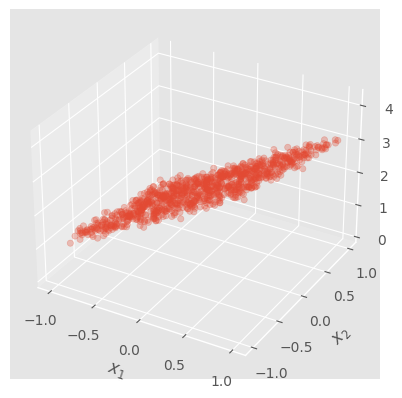

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], y, alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$", zlabel="$y$")

In [24]:
w = np.linalg.inv(X_ones.T @ X_ones) @ X_ones.T @ y

In [25]:
w

array([[ 1.4989639 ],
       [-0.49643195],
       [ 2.10113939]])

In [26]:
x1 = np.linspace(-1, 1, 10).reshape(-1, 1)
x2 = np.linspace(-1, 1, 10).reshape(-1, 1)
X_pred = np.concatenate([x1, x2, np.ones_like(x1)], axis=1)

In [27]:
X_pred

array([[-1.        , -1.        ,  1.        ],
       [-0.77777778, -0.77777778,  1.        ],
       [-0.55555556, -0.55555556,  1.        ],
       [-0.33333333, -0.33333333,  1.        ],
       [-0.11111111, -0.11111111,  1.        ],
       [ 0.11111111,  0.11111111,  1.        ],
       [ 0.33333333,  0.33333333,  1.        ],
       [ 0.55555556,  0.55555556,  1.        ],
       [ 0.77777778,  0.77777778,  1.        ],
       [ 1.        ,  1.        ,  1.        ]])

In [28]:
y_pred = X_pred @ w

In [29]:
y_pred

array([[1.09860745],
       [1.32139232],
       [1.5441772 ],
       [1.76696208],
       [1.98974696],
       [2.21253183],
       [2.43531671],
       [2.65810159],
       [2.88088646],
       [3.10367134]])

[Text(0.5, 0, '$x_1$'), Text(0.5, 0.5, '$x_2$'), Text(0.5, 0, '$y$')]

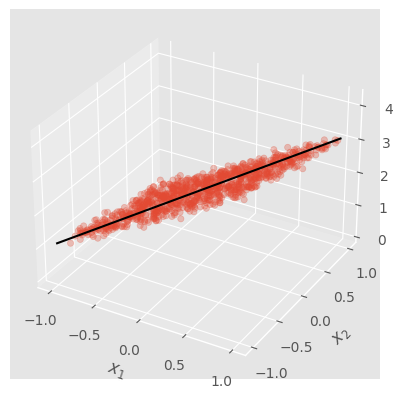

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], y, alpha=0.3)
ax.plot(x1, x2, y_pred, c="k")
ax.set(xlabel="$x_1$", ylabel="$x_2$", zlabel="$y$")

In [32]:
model = LinearRegression().fit(X, y)

In [33]:
model.coef_

array([[ 1.4989639 , -0.49643195]])

In [34]:
model.intercept_

array([2.10113939])

In [35]:
x1 = np.linspace(-1, 1, 10).reshape(-1, 1)
x2 = np.linspace(-1, 1, 10).reshape(-1, 1)
X_pred = np.concatenate([x1, x2], axis=1)
y_pred = model.predict(X_pred)

[Text(0.5, 0, '$x_1$'), Text(0.5, 0.5, '$x_2$'), Text(0.5, 0, '$y$')]

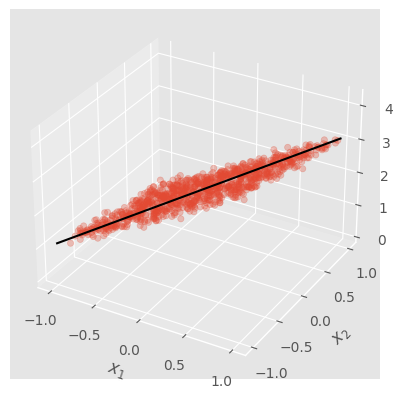

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], y, alpha=0.3)
ax.plot(x1, x2, y_pred, c="k")
ax.set(xlabel="$x_1$", ylabel="$x_2$", zlabel="$y$")

In [37]:
from sklearn.datasets import load_diabetes

In [38]:
data = load_diabetes()

In [39]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [40]:
X, y = data["data"], data["target"]

In [41]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [42]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [43]:
model = LinearRegression().fit(X, y)

In [44]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [47]:
y_pred = model.predict(X[[1]])
y_pred

array([68.07103297])

In [48]:
y[1]

75.0